 ### 3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [2]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.shape

(7662, 4)

In [7]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

7662 rows, 4 colums. datatype is "object"

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [11]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [95]:
gdp_df.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [101]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [109]:
country_gdp =gdp_df.Country.value_counts().to_frame()
country_gdp

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [111]:
country_gdp.value_counts()

count
33       202
28        10
32         5
23         4
31         3
22         3
29         2
26         2
10         2
12         1
25         1
20         1
19         1
16         1
30         1
15         1
14         1
24         1
Name: count, dtype: int64

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

C:\Users\debor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


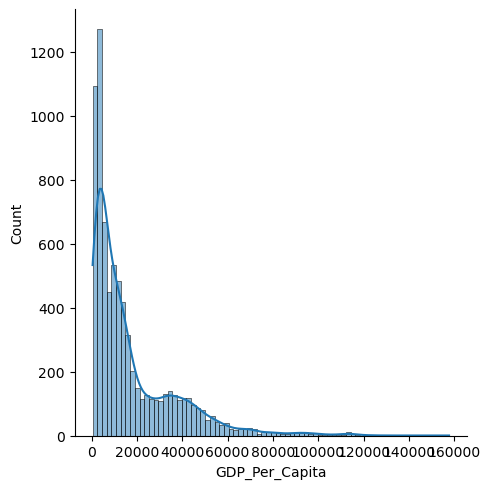

In [77]:
sns.displot( data=gdp_df["GDP_Per_Capita"], kde=True );

C:\Users\debor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


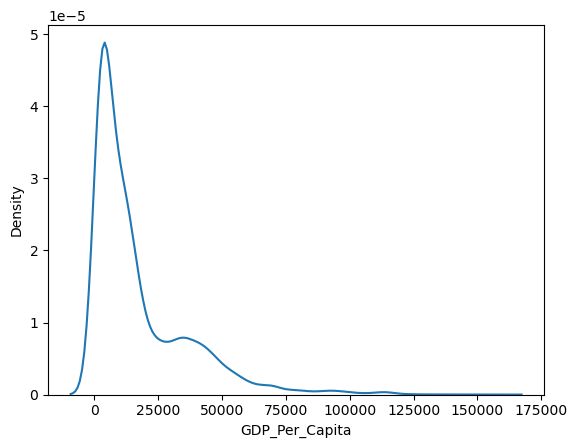

In [69]:
sns.kdeplot(gdp_df['GDP_Per_Capita']);

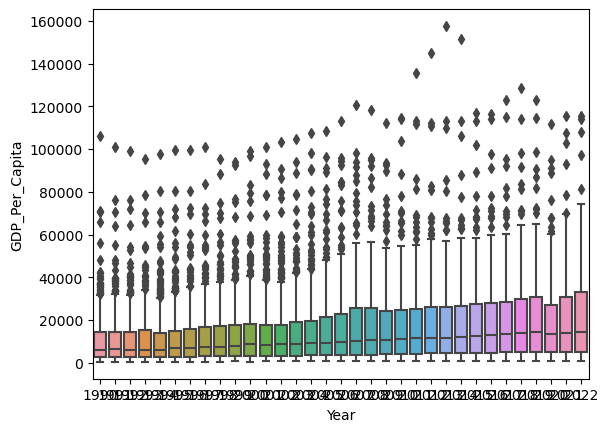

In [73]:
sns.boxplot( x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"] );

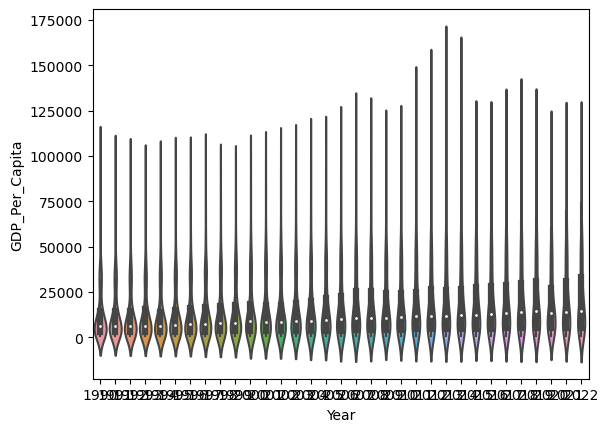

In [65]:
sns.violinplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"]);

### 9. What was the median GDP per capita value in 2020?

In [91]:
gdp_df['Year'].mean()

2006.3882798225006

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [ ]:
gdp_decades = gdp_df

### 11. Which country was the first to have a GDP per capita greater than $100,000?

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

### 16. Look at the number of observations in this dataset per year. What do you notice?

### 17. What is the first year to have a non-zero internet users percentage value?

### 18. How does the distribution of internet users percent differ for 2000 and 2014?


### 19. For how many countries was the percentage of internet users below 5% in 2014?


### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


### BONUS!!!

### 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
